In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Comp3220/jobs_in_data.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [2]:
!pip install plotly


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotnine import ggplot, aes, geom_bar
import folium
from folium.plugins import MarkerCluster

In [4]:
# Descriptive statiscs for numarical data "Salary in USD"
DS = df["salary_in_usd"].describe()
DS


count      9355.000000
mean     150299.495564
std       63177.372024
min       15000.000000
25%      105700.000000
50%      143000.000000
75%      186723.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [5]:
# data information.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [6]:
# Working year.
df['work_year'].unique()

array([2023, 2022, 2020, 2021])

In [7]:
# Freqency of Working year.
df['work_year'].value_counts().astype(int)

2023    7453
2022    1634
2021     197
2020      71
Name: work_year, dtype: int64

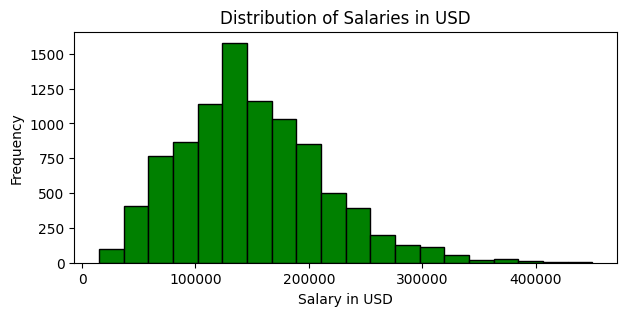

In [8]:
# Distribution of "salary_in_usd" columns.
plt.figure(figsize=(7, 3))
plt.hist(df['salary_in_usd'], bins=20, color='Green', edgecolor='black')
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

In [9]:
# We can see from the above distribution histogram chart that it is not normal, right skewed. Maximum jobs salaries range are between 100000 to 200000.
# Hight salary is 400000 that is very low number as outliers.

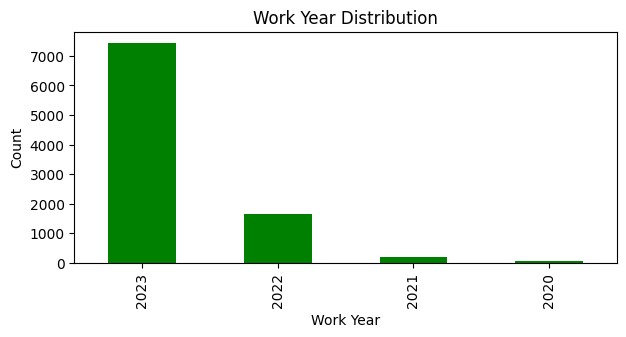

In [10]:
# Distribution of "work_year" columns.
plt.figure(figsize=(7, 3))
year_counts = df['work_year'].value_counts()
year_counts.plot(kind='bar', color = 'Green', title='Work Year Distribution')
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.show()


In [11]:
# We can see from the above distribution histogram chart that most of works (7453) have been done in year 2023
# and minimum works(71) have been done in 2020 and 2021 close to 0.

In [12]:
# Counting frequenecies with setting frequency and job tile colummn job_title.
dfc1 = df['job_title'].value_counts()
dfc1 = df['job_title'].value_counts().reset_index()
dfc1.columns = ['Job Title', 'Frequency']
dfc1

,Job Title,Frequency
0,Data Engineer,2195
1,Data Scientist,1989
2,Data Analyst,1388
3,Machine Learning Engineer,991
4,Applied Scientist,272
...,...,...
120,Consultant Data Engineer,1
121,Sales Data Analyst,1
122,Managing Director Data Science,1
123,AWS Data Architect,1


<ipython-input-57-79c7a7ebc3cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



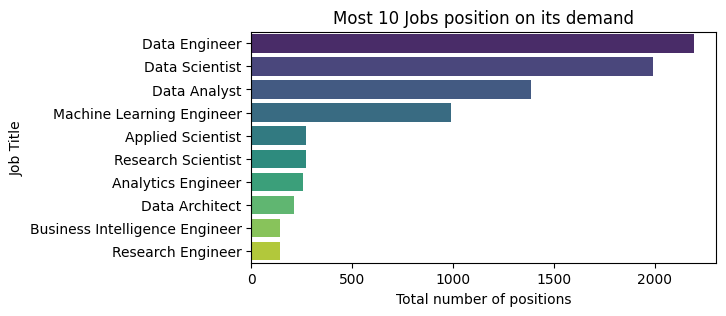

In [57]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Frequency', y='Job Title', data=dfc1.head(10), palette='viridis')
plt.title('Most 10 Jobs position on its demand')
plt.xlabel('Total number of positions')
plt.ylabel('Job Title')
plt.show()

<Figure size 700x300 with 0 Axes>

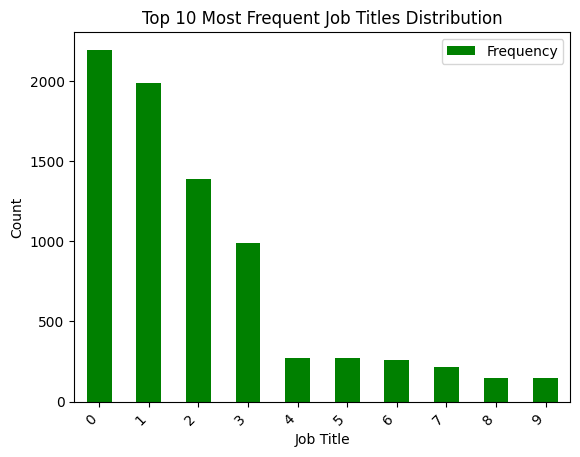

In [14]:
# Most popular 10 jobs with frequencies in job_title distribution chart.
plt.figure(figsize=(7, 3))
dfc1.head(10).plot(kind='bar', color = 'Green', title='Top 10 Most Frequent Job Titles Distribution')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()

<ipython-input-59-238496620c1c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



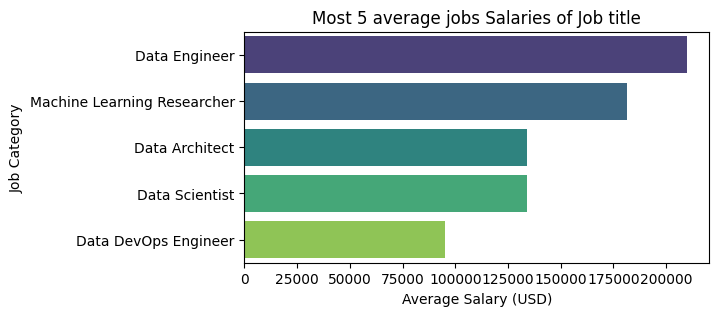

In [59]:
dfcg= df.head(10).groupby('job_title')['salary_in_usd'].mean().reset_index()
dfcg = dfcg.sort_values(by='salary_in_usd', ascending=False)


# Create a bar plot for average salaries by job category
plt.figure(figsize=(6, 3))
sns.barplot(x='salary_in_usd', y='job_title', data=dfcg.head(10), palette='viridis')
plt.title('Most 5 average jobs Salaries of Job title')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Category')
plt.show()

## Jobs Category

In [15]:
# All jobs category with frequencies in job_category are----.
dfc3 = df['job_category'].value_counts()
dfc3

Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: job_category, dtype: int64

In [16]:
# Counting frequenecies with setting frequency and job tile colummn.
dfc3 = df['job_category'].value_counts()
dfc3 = df['job_category'].value_counts().reset_index()
dfc3.columns = ['Job Title', 'Frequency']
dfc3

,Job Title,Frequency
0,Data Science and Research,3014
1,Data Engineering,2260
2,Data Analysis,1457
3,Machine Learning and AI,1428
4,Leadership and Management,503
5,BI and Visualization,313
6,Data Architecture and Modeling,259
7,Data Management and Strategy,61
8,Data Quality and Operations,55
9,Cloud and Database,5


<Figure size 700x300 with 0 Axes>

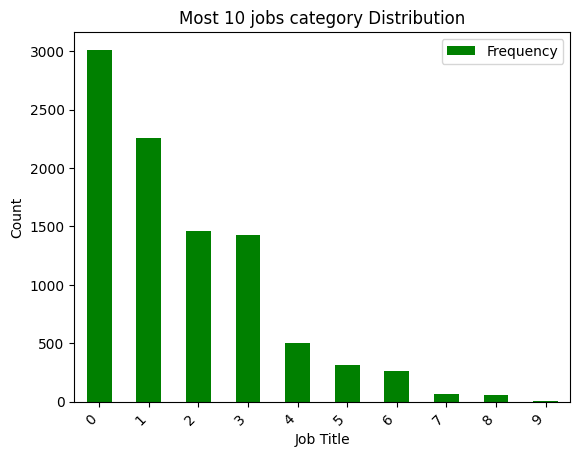

In [61]:
# All jobs category with frequencies in job_category  distribution are----.
plt.figure(figsize=(7, 3))
dfc3.head(10).plot(kind='bar', color = 'Green', title='Most 10 jobs category Distribution')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()

<ipython-input-62-46b6b4a4dac4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



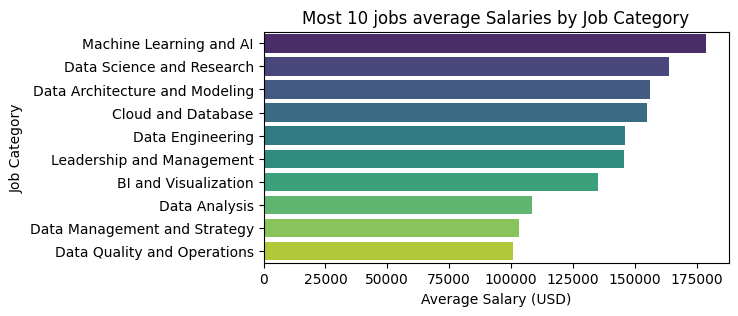

In [62]:
# Calculate average salary for each job category
asEjc= df.groupby('job_category')['salary_in_usd'].mean().reset_index()
asEjc = asEjc.sort_values(by='salary_in_usd', ascending=False)


# Create a bar plot for average salaries by job category
plt.figure(figsize=(6, 3))
sns.barplot(x='salary_in_usd', y='job_category', data=asEjc, palette='viridis')
plt.title('Most 10 jobs average Salaries by Job Category')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Category')
plt.show()

<ipython-input-19-4e401bd5a737>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-19-4e401bd5a737>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-19-4e401bd5a737>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-19-4e401bd5a737>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-19-4e401bd5a737>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-19-4e401bd5a737>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-19-4e401bd5a737>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-19-4e401bd5a737>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `error

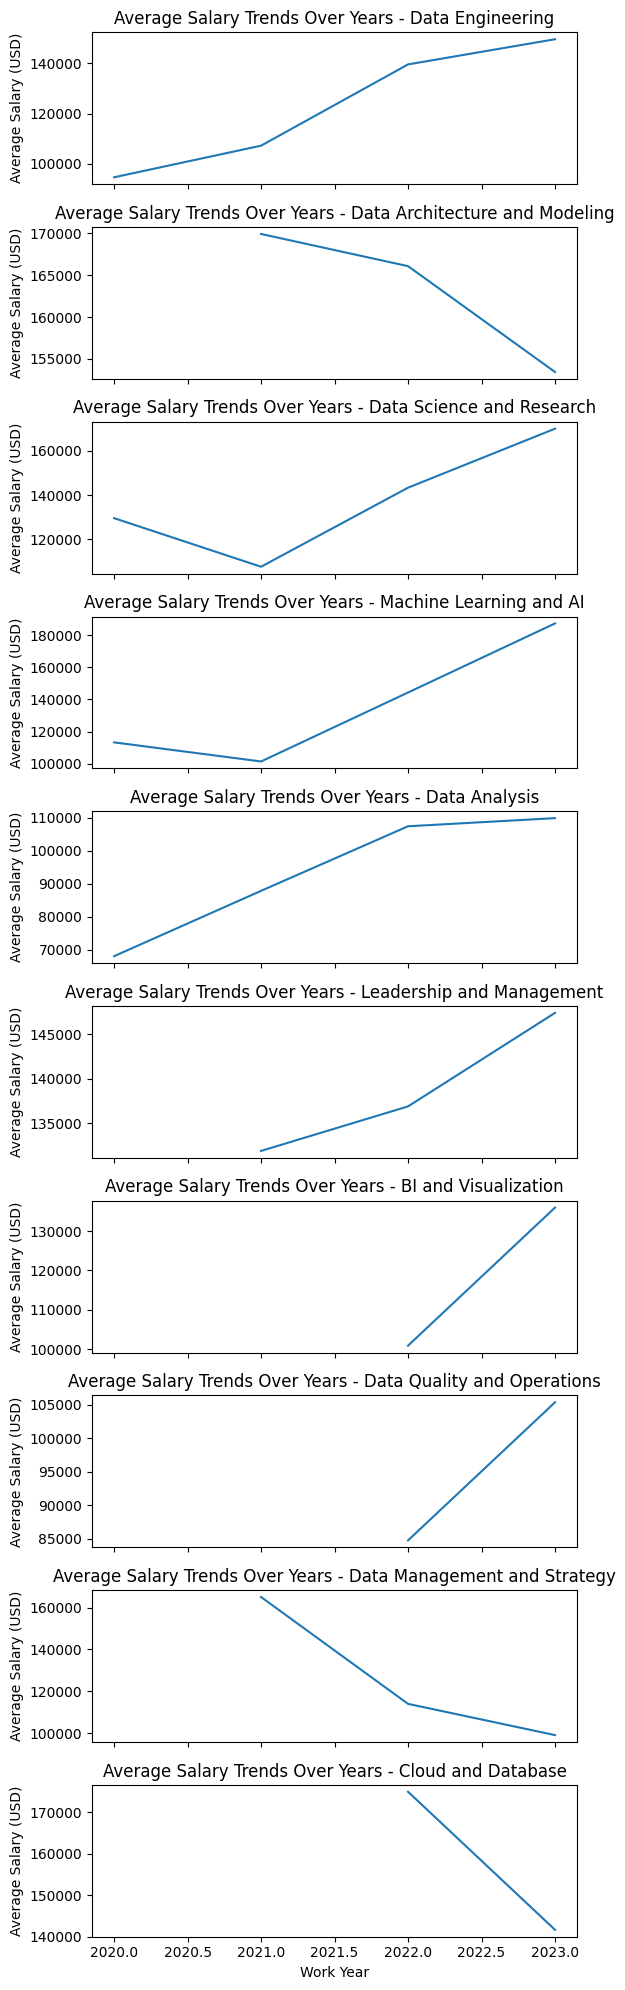

In [19]:
# Assuming your DataFrame is named data
jobC = df['job_category'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(jobC), ncols=1, figsize=(6, 2 * len(jobC)), sharex=True)

# Iterate through each job category
for i, category in enumerate(jobC):
    ax = axes[i]
    category_data = df[df['job_category'] == category]
    sns.lineplot(x='work_year', y='salary_in_usd', data=category_data, ci=None, ax=ax)
    ax.set_title(f'Average Salary Trends Over Years - {category}')
    ax.set_xlabel('Work Year')
    ax.set_ylabel('Average Salary (USD)')

plt.tight_layout()
plt.show()

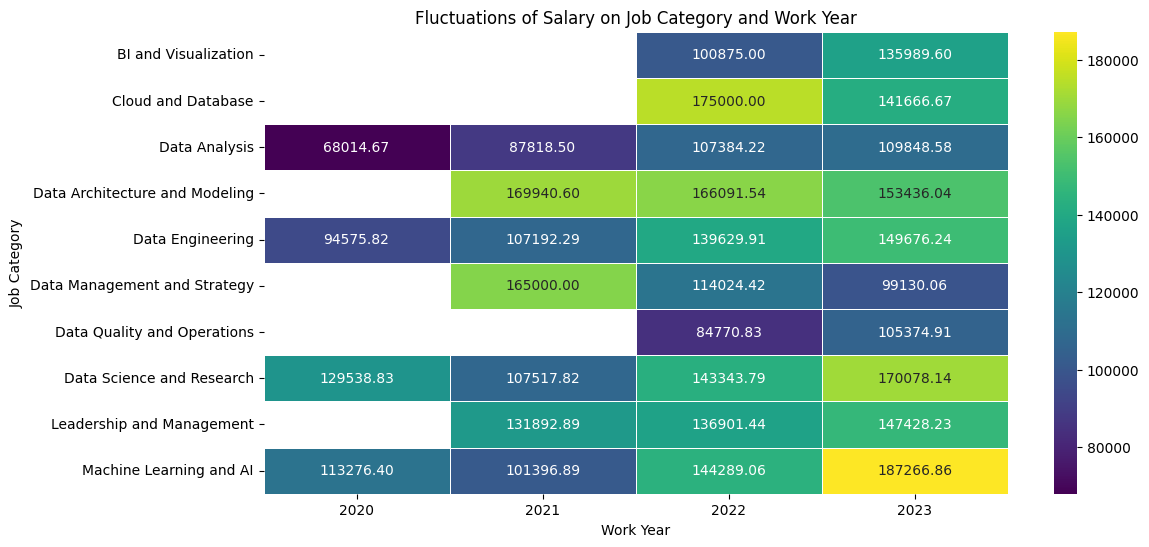

In [20]:
# To analyze salary fluctuations by job category and work year, we can use a heatmap or a grouped bar chart;
plt.figure(figsize=(12, 6))
heatmap_data = df.pivot_table(index='job_category', columns='work_year', values='salary_in_usd', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Fluctuations of Salary on Job Category and Work Year')
plt.xlabel('Work Year')
plt.ylabel('Job Category')
plt.show()

## Different currencies

In [21]:
# All currencies with frequency in salary_currency are----.
dfc4 = df['salary_currency'].value_counts()
dfc4

USD    8591
GBP     347
EUR     340
CAD      38
AUD      11
PLN       7
SGD       6
CHF       5
BRL       4
TRY       3
DKK       3
Name: salary_currency, dtype: int64

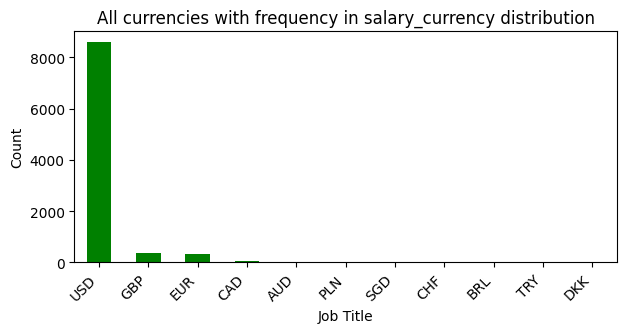

In [22]:
# All currencies with frequencies in salary_currency distribution is----.
plt.figure(figsize=(7, 3))
dfc4.plot(kind='bar', color = 'Green', title='All currencies with frequency in salary_currency distribution')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()

In [23]:
# Counting frequenecies with setting frequency and job tile colummn.
#pp = df['salary_currency'].value_counts()
dfc4 = df['salary_currency'].value_counts().reset_index()
dfc4.columns = ['Job Title', 'Frequency']
dfc4

,Job Title,Frequency
0,USD,8591
1,GBP,347
2,EUR,340
3,CAD,38
4,AUD,11
5,PLN,7
6,SGD,6
7,CHF,5
8,BRL,4
9,TRY,3


In [24]:
# Calculate average salary by different currency.
asDc= df.groupby('salary_currency')['salary_in_usd'].mean().reset_index()
asDc = asDc.sort_values(by='salary_in_usd', ascending=False)
asDc

,salary_currency,salary_in_usd
10,USD,156851.450821
3,CHF,101659.400000
2,CAD,96890.684211
6,GBP,88783.760807
8,SGD,81724.333333
0,AUD,78538.181818
5,EUR,63738.458824
7,PLN,36099.428571
4,DKK,31192.666667
1,BRL,26168.750000


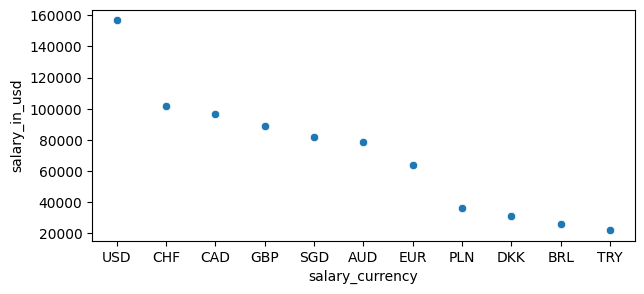

In [25]:
# Distribution of calculating average salary by different currencies is----.
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 3))
sns.scatterplot(x='salary_currency',y='salary_in_usd',data=asDc)
plt.show()

## Employee Residences.

In [26]:
# Top 10 employee residence with frequencies in employee_residence are----.
dfc6 = df['employee_residence'].value_counts().reset_index()
dfc6.columns = ['Job Title', 'Frequency']
dfc6.head(5)

,Job Title,Frequency
0,United States,8086
1,United Kingdom,442
2,Canada,224
3,Spain,117
4,Germany,66


<Figure size 700x300 with 0 Axes>

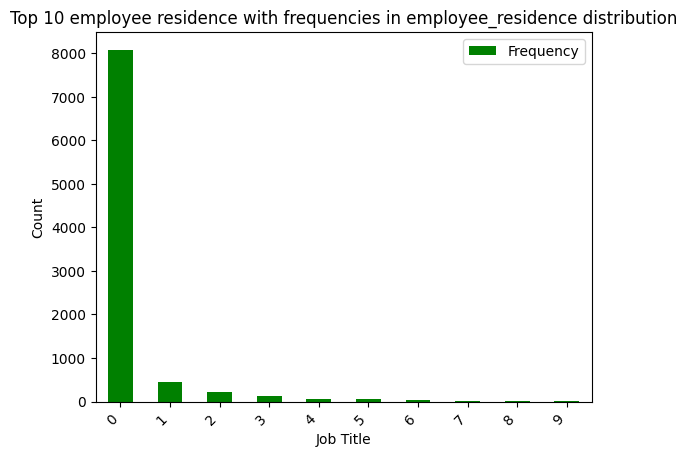

In [27]:
# Top 10 employee residence with frequencies in employee_residence distribution is----.
plt.figure(figsize=(7, 3))
dfc6.head(10).plot(kind='bar', color = 'Green', title='Top 10 employee residence with frequencies in employee_residence distribution')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()

<ipython-input-69-035ddbcf1cf8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



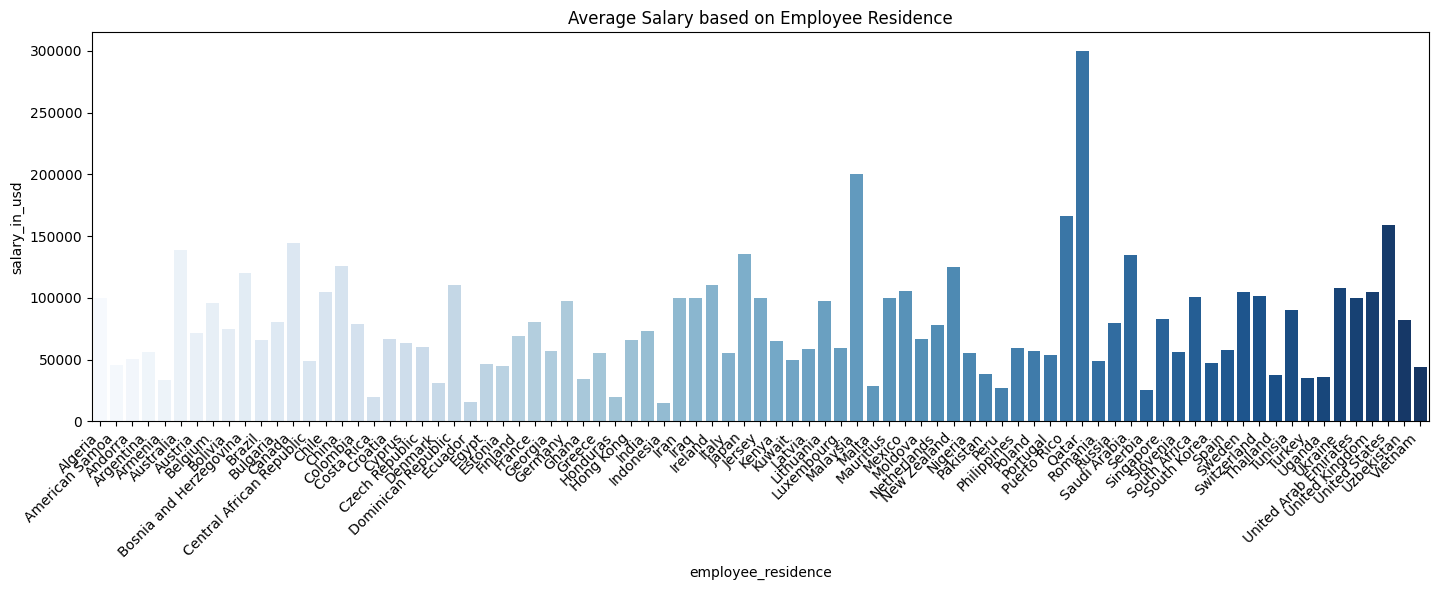

In [69]:
# Average Salary based on Employee Residence
asEr = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()
#asEr = asEr.sort_values(by='salary_in_usd', ascending=True)

# Create Plots
plt.figure(figsize=(28, 6))

# Plot 1: Average Salary based on Employee Residence
plt.subplot(1, 2, 1)
sns.barplot(x='employee_residence', y='salary_in_usd', data=asEr, palette='Blues')
plt.title('Average Salary based on Employee Residence')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Employee Expriences Level.


In [29]:
# All experience level with frequencies in experience_level are----.
dfc7 = df['experience_level'].value_counts().reset_index()
dfc7.columns = ['Job Title', 'Frequency']
dfc7

,Job Title,Frequency
0,Senior,6709
1,Mid-level,1869
2,Entry-level,496
3,Executive,281


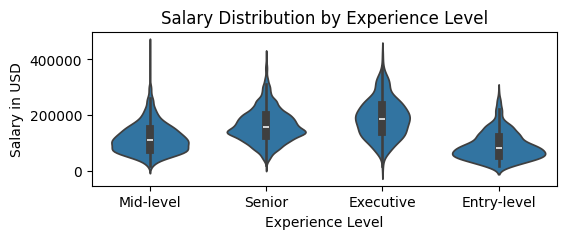

In [71]:
# Distribution of all experience level with frequencies in experience_level is----.
# Assuming your DataFrame is named data
plt.figure(figsize=(6, 2))
sns.violinplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


<ipython-input-76-207c1f1c5201>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



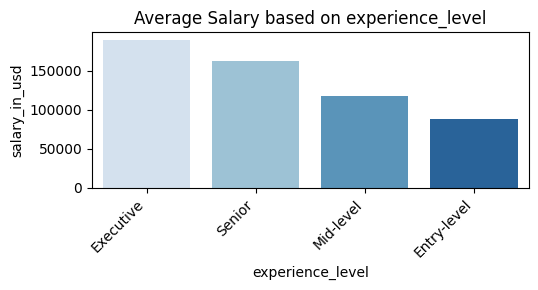

In [76]:
# Average Salary based on Employee Residence
dfc7g = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
dfc7g = dfc7g.sort_values(by='salary_in_usd', ascending=False)

# Create Plots
plt.figure(figsize=(10, 3))

# Plot 1: Average Salary based on Employee Residence
plt.subplot(1, 2, 1)
sns.barplot(x='experience_level', y='salary_in_usd', data=dfc7g, palette='Blues')
plt.title('Average Salary based on experience_level')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<ipython-input-31-390217a64476>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



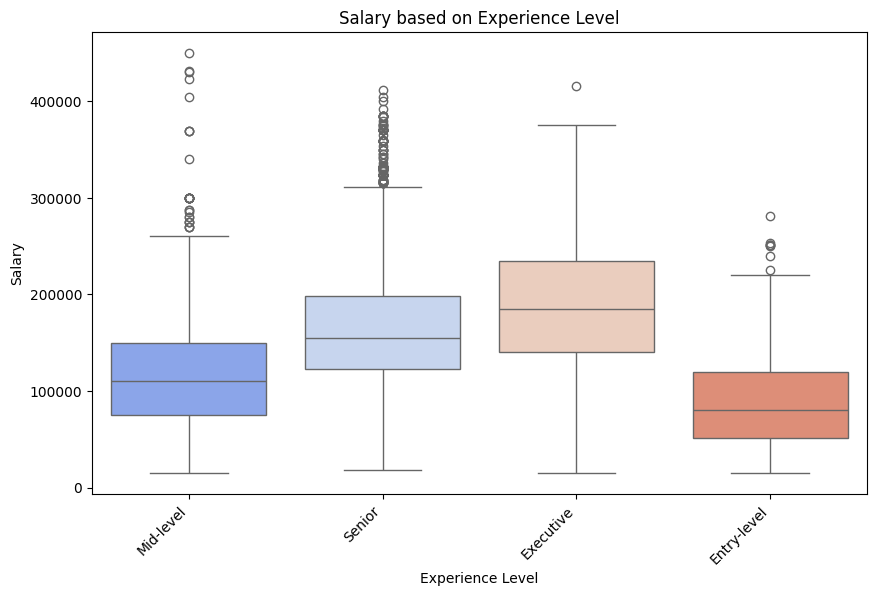

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='coolwarm')
plt.title('Salary based on Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

## Employment Types.

In [32]:
# All employment types with frequencies in data column "employment_type" are----.
dfc8 = df['employment_type'].value_counts()
dfc8

Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: employment_type, dtype: int64

<ipython-input-33-f6d2c4a06c81>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



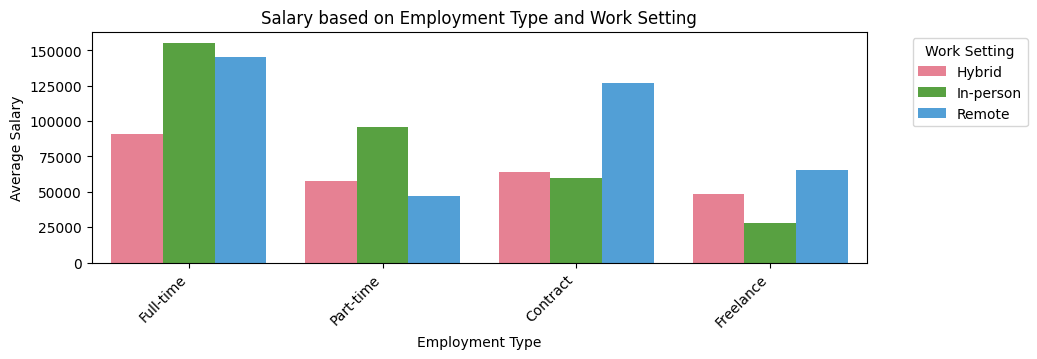

In [33]:
# Distribution of all employment types with frequencies in data column "employment_type" is----.
# Create a bar plot for average salary based on employment type, work setting.
plt.figure(figsize=(10, 3))
sns.barplot(x='employment_type', y='salary_in_usd', hue='work_setting', data=df, ci=None, palette='husl', estimator='mean')
plt.title('Salary based on Employment Type and Work Setting')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary')
plt.legend(title='Work Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-34-da7717ef0fec>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



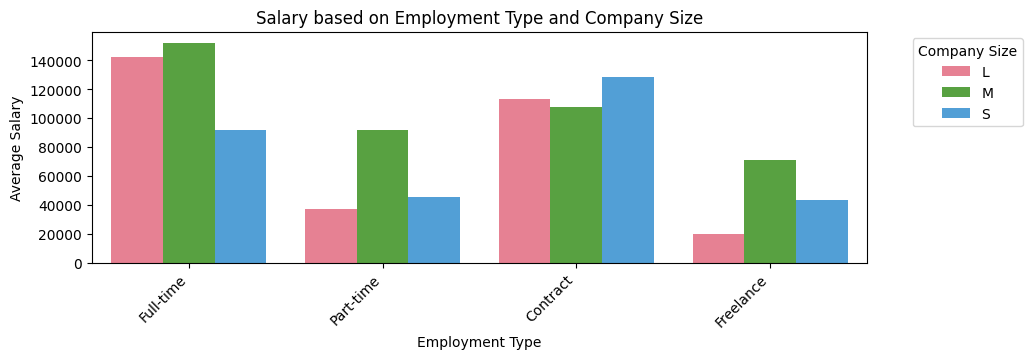

In [34]:
# Create a bar plot for average salary based on employment type, company size.
plt.figure(figsize=(10, 3))
sns.barplot(x='employment_type', y='salary_in_usd', hue='company_size', data=df, ci=None, palette='husl', estimator='mean')
plt.title('Salary based on Employment Type and Company Size')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary')
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
# All work setting with frequencies in data column "work_setting" are----.
dfc9 = df['work_setting'].value_counts()
dfc9

In-person    5730
Remote       3434
Hybrid        191
Name: work_setting, dtype: int64

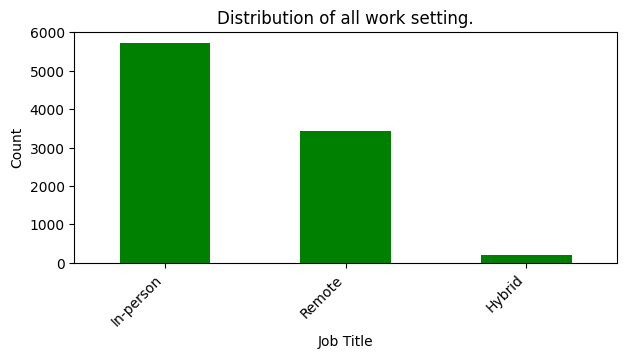

In [36]:
# Distribution of all work setting with frequencies in data column "work_setting" is----.
plt.figure(figsize=(7, 3))
dfc9.plot(kind='bar', color = 'Green', title='Distribution of all work setting.')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()

In [37]:
# All company location with jobs frequencies in data column "company_location" are----.
dfc10 = df['company_location'].value_counts()
dfc10

United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: company_location, Length: 70, dtype: int64

In [38]:
# Total Number of company locations are.....
print('Total Number of company locations are:', df['company_location'].nunique() )

Total Number of company locations are: 70


In [39]:
# Top 10 company locations with frequencies in data column "company_location" are----.
dfc10 = df['company_location'].value_counts().head(10)
dfc10

United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
France              50
Australia           24
Portugal            24
Netherlands         21
Brazil              17
Name: company_location, dtype: int64

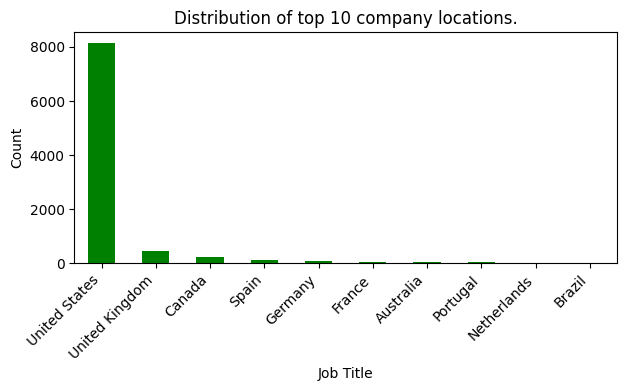

In [40]:
# Distribution of top 10 company locations with job frequencies in data column "company_location" is----.
plt.figure(figsize=(7, 3))
dfc10.plot(kind='bar', color = 'Green', title='Distribution of top 10 company locations.')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()

In [41]:
# All company sizes with jobs frequencies in data column "company_size" are----.
dfc11 = df['company_size'].value_counts()
dfc11

M    8448
L     748
S     159
Name: company_size, dtype: int64

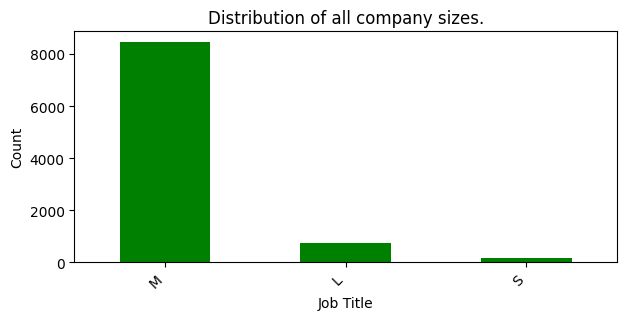

In [42]:
# Distribution of all company sizes with jobs frequencies in data column "company_size"  is----.
plt.figure(figsize=(7, 3))
dfc11.plot(kind='bar', color = 'Green', title='Distribution of all company sizes.')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()

In [43]:
# If 'work_year' is not in datetime format, convert it using pd.to_datetime
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')

# Filtering data for the years 2020, 2021, 2022, and 2023.
fdfy = df[df['work_year'].dt.year.isin([2020, 2021, 2022, 2023])]

# Calculating average salary for each year
aspy = fdfy.groupby(fdfy['work_year'].dt.year)['salary_in_usd'].mean().reset_index()
aspy = aspy.sort_values(by='salary_in_usd', ascending=False)

aspy.columns = ['Work Year', 'Average Salary']

# Convert 'Work Year' to integers
aspy['Work Year'] = aspy['Work Year'].astype(int)
aspy

,Work Year,Average Salary
3,2023,155132.591708
2,2022,135467.501836
1,2021,106483.644670
0,2020,105878.859155


<Figure size 700x300 with 0 Axes>

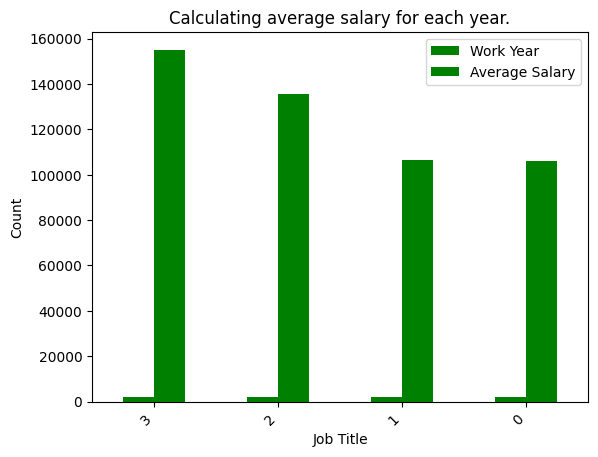

In [44]:
# Distribution of calculating average salary for each year is----.
plt.figure(figsize=(7, 3))
aspy.plot(kind='bar', color = 'Green', title='Calculating average salary for each year.')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()

In [45]:
# Calculating average salary for each job.
aspj = df.groupby(df['job_title'])['salary_in_usd'].mean().reset_index()
aspj = aspj.sort_values(by='salary_in_usd', ascending=False)
aspj.columns = ['job_title', 'Average Salary']
aspj

,job_title,Average Salary
8,Analytics Engineering Manager,399880.000
68,Data Science Tech Lead,375000.000
107,Managing Director Data Science,300000.000
87,Head of Machine Learning,259000.000
6,AWS Data Architect,258000.000
...,...,...
49,Data Management Analyst,56000.000
57,Data Operations Specialist,55355.000
105,Machine Learning Specialist,55000.000
88,Insight Analyst,47673.875


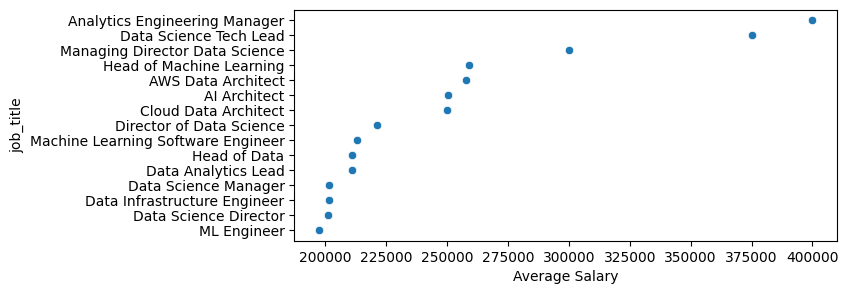

In [46]:
# Distribution of calculating average salary for 15 top salary jobs are----.
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 3))
sns.scatterplot(x='Average Salary',y='job_title',data=aspj.head(15))
plt.show()

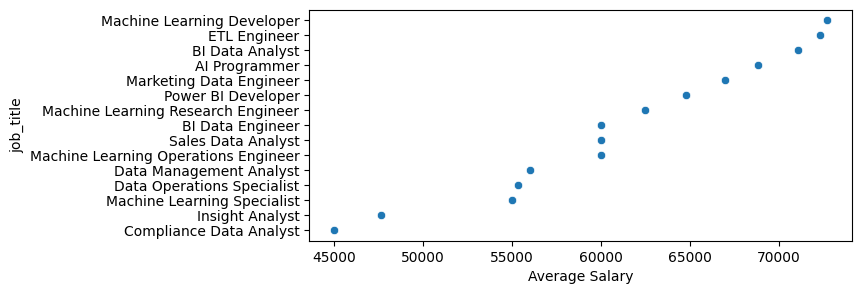

In [47]:
# Distribution of calculating average salary for 15 lowest salary jobs are----.
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 3))
sns.scatterplot(x='Average Salary',y='job_title',data=aspj.tail(15))
plt.show()